<a href="https://colab.research.google.com/github/braiso-22/Neuronal_Networks_Convolution/blob/main/Learning_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv

def procesa_imagenes(dataset):
  new_dataset = []
  for img in dataset:
    img = cv.resize(img, (56, 56))
    img = cv.cvtColor (img, cv.COLOR_GRAY2BGR)
    new_dataset.append(img)
  return np.array(new_dataset)

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

val_images = train_images[:6000]
val_labels = train_labels[:6000]

train_images = train_images[6000:]
train_labels = train_labels[6000:]


print (train_images.shape)

train_images = procesa_imagenes(train_images)
test_images = procesa_imagenes(test_images)
val_images = procesa_imagenes(val_images)

train_images = train_images.reshape((60000-6000, 56, 56, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 56, 56, 3))
test_images = test_images.astype('float32') / 255

val_images = val_images.reshape((6000, 56, 56, 3))
val_images = val_images.astype('float32') / 255


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)


(54000, 28, 28)


In [ ]:
import keras
from keras import layers
from keras import models
import tensorflow as tf

from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (56, 56, 3), 
                                include_top = False, 
                                weights = 'imagenet')


pre_trained_model.summary()

for layer in pre_trained_model.layers:
  layer.trainable = False


pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 56, 56, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 56, 56, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 56, 56, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 28, 28, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 28, 28, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 28, 28, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 14, 14, 128)       0     

In [ ]:
model = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
batch_size = 100
epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(val_images, val_labels),
          verbose=1
          )

Epoch 1/10
540/540 [==============================] - 30s 38ms/step - loss: 1.5350 - accuracy: 0.6721 - val_loss: 1.0271 - val_accuracy: 0.8043
Epoch 2/10
540/540 [==============================] - 20s 37ms/step - loss: 0.8266 - accuracy: 0.8179 - val_loss: 0.6709 - val_accuracy: 0.8430
Epoch 3/10
540/540 [==============================] - 21s 38ms/step - loss: 0.6020 - accuracy: 0.8499 - val_loss: 0.5268 - val_accuracy: 0.8627
Epoch 4/10
540/540 [==============================] - 21s 39ms/step - loss: 0.4932 - accuracy: 0.8704 - val_loss: 0.4486 - val_accuracy: 0.8803
Epoch 5/10
540/540 [==============================] - 21s 39ms/step - loss: 0.4251 - accuracy: 0.8866 - val_loss: 0.3926 - val_accuracy: 0.8952
Epoch 6/10
540/540 [==============================] - 21s 39ms/step - loss: 0.3775 - accuracy: 0.8983 - val_loss: 0.3562 - val_accuracy: 0.9023
Epoch 7/10
540/540 [==============================] - 21s 38ms/step - loss: 0.3424 - accuracy: 0.9068 - val_loss: 0.3269 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 16ms/step - loss: 0.2604 - accuracy: 0.9288
Test loss: 0.2603832185268402
Test accuracy: 0.9287999868392944


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


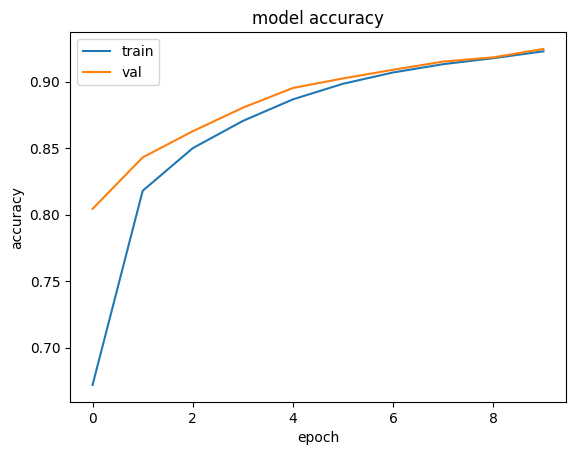

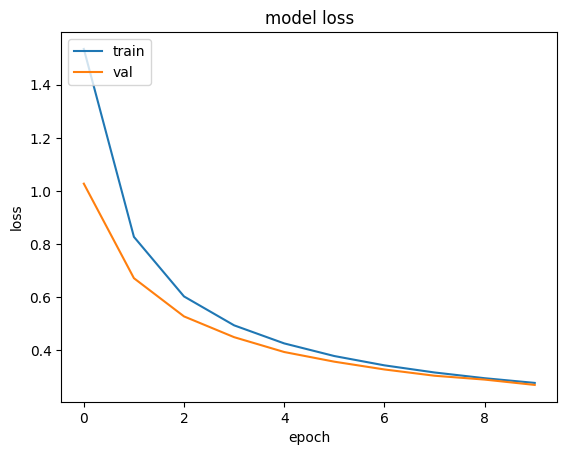

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##Fine Tuning

In [ ]:
import tensorflow as tf

from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (56, 56, 3), 
                                include_top = False, 
                                weights = 'imagenet')

pre_trained_model.trainable = True

set_trainable = False


for layer in pre_trained_model.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable: 
    layer.trainable = True
  else:
    layer.trainable = False

pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 56, 56, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 56, 56, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 56, 56, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 28, 28, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 28, 28, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 28, 28, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 14, 14, 128)       0     

In [ ]:
model = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 7,213,322
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
batch_size = 100
epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(val_images, val_labels),
          verbose=1
          )

Epoch 1/10
540/540 [==============================] - 28s 47ms/step - loss: 0.1754 - accuracy: 0.9471 - val_loss: 0.0533 - val_accuracy: 0.9835
Epoch 2/10
540/540 [==============================] - 25s 46ms/step - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.0405 - val_accuracy: 0.9878
Epoch 3/10
540/540 [==============================] - 26s 47ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0280 - val_accuracy: 0.9897
Epoch 4/10
540/540 [==============================] - 26s 47ms/step - loss: 0.0277 - accuracy: 0.9917 - val_loss: 0.0253 - val_accuracy: 0.9910
Epoch 5/10
540/540 [==============================] - 25s 47ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0262 - val_accuracy: 0.9905
Epoch 6/10
540/540 [==============================] - 26s 48ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.0258 - val_accuracy: 0.9912
Epoch 7/10
540/540 [==============================] - 26s 49ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0248 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.0248 - accuracy: 0.9909
Test loss: 0.024849554523825645
Test accuracy: 0.9908999800682068


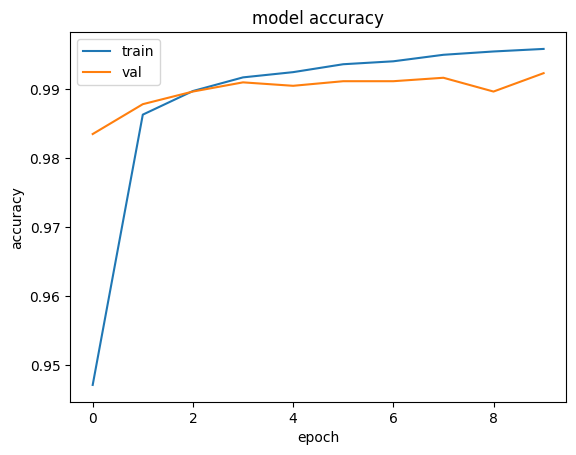

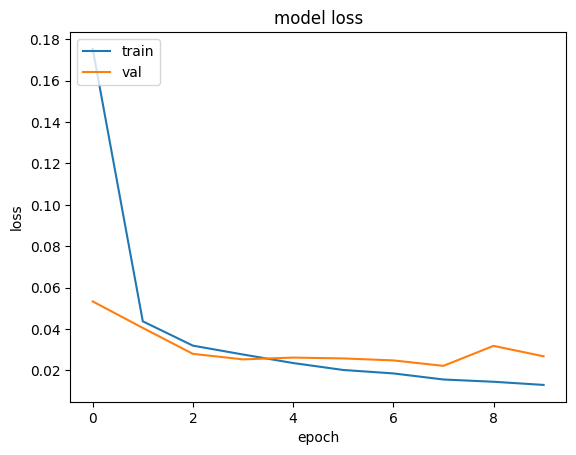

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()